<a href="https://colab.research.google.com/github/tracynguyen17/FinalProject/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import glob
import os

dir = '/content/drive/My Drive/ITCS 3162 Final Project'

path = os.path.join(dir, 'Cleaned_Laptop_data.csv')

df = pd.read_csv(path)

Mounted at /content/drive


In [84]:
df.shape

(896, 23)

In [85]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [87]:
df.isnull().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [88]:
df['latest_price'] = (df['latest_price'] / 76.51)

In [89]:
df['old_price'] = (df['old_price'] / 76.51)

In [90]:
df_prices = df[['latest_price','old_price']].copy()
df_prices

,latest_price,old_price
0,326.623971,428.571429
1,256.044961,278.721736
2,261.273036,365.834531
3,280.878317,365.834531
4,326.623971,437.720559
...,...,...
891,1895.046399,2548.555744
892,1960.397334,0.000000
893,1868.906025,0.000000
894,509.606587,627.238270


In [91]:
df.columns[df.isin(['Missing']).any()]

Index(['model', 'processor_gnrtn', 'display_size'], dtype='object')

In [92]:
df['model'].value_counts()

Missing     95
VivoBook    89
Inspiron    77
Pavilion    38
IdeaPad     37
            ..
B50-70       1
GE76         1
GP65         1
GP76         1
Thinkpad     1
Name: model, Length: 117, dtype: int64

In [93]:
df['processor_gnrtn'].value_counts()

11th       346
10th       246
Missing    239
8th         43
7th         12
9th          6
12th         3
4th          1
Name: processor_gnrtn, dtype: int64

In [94]:
df['display_size'].value_counts()

Missing    332
15.6       218
16         135
14         131
13.3        40
17.3         9
14.96        7
14.1         6
13           4
15           3
14.2         3
16.2         3
12.2         2
14.9         1
16.1         1
13.4         1
Name: display_size, dtype: int64

In [95]:
df['brand'].value_counts()

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

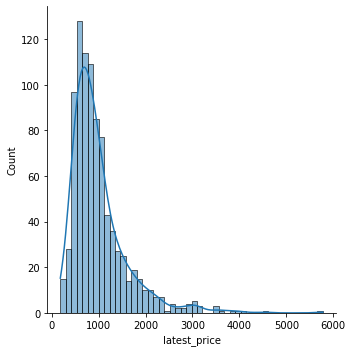

In [96]:
sns.displot(df['latest_price'], kde=True);

In [97]:
df['brand'] = df['brand'].str.replace("lenovo", "Lenovo")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

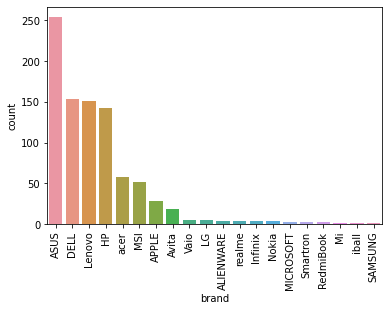

In [98]:
sns.countplot(data = df, x = 'brand', order = df['brand'].value_counts().index)
plt.xticks(rotation="vertical")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

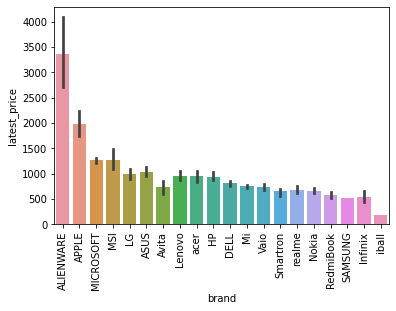

In [99]:
result = df.groupby(["brand"])['latest_price'].median().reset_index().sort_values('latest_price', ascending=False)
sns.barplot(data=df, x='brand', y="latest_price", order=result['brand'])
plt.xticks(rotation="vertical")

In [100]:
categoricals = df.select_dtypes(include=['object'])
categoricals

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,weight,display_size,Touchscreen,msoffice
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,ThinNlight,Missing,No,No
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,Casual,Missing,No,No
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,Missing,No,No
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,32-bit,Casual,Missing,No,No


In [101]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            896 non-null    object
 1   model            896 non-null    object
 2   processor_brand  896 non-null    object
 3   processor_name   896 non-null    object
 4   processor_gnrtn  896 non-null    object
 5   ram_gb           896 non-null    object
 6   ram_type         896 non-null    object
 7   ssd              896 non-null    object
 8   hdd              896 non-null    object
 9   os               896 non-null    object
 10  os_bit           896 non-null    object
 11  weight           896 non-null    object
 12  display_size     896 non-null    object
 13  Touchscreen      896 non-null    object
 14  msoffice         896 non-null    object
dtypes: object(15)
memory usage: 105.1+ KB


In [102]:
df['ram_gb'] = df['ram_gb'].str.replace("GB GB", "")
df['ssd'] = df['ssd'].str.replace("GB", "")
df['hdd'] = df['hdd'].str.replace("GB", "")
df['os_bit'] = df['os_bit'].str.replace("-bit", "")

df['ram_gb'] = df['ram_gb'].astype('int64')
df['ssd'] = df['ssd'].astype('int64')
df['hdd'] = df['hdd'].astype('int64')
df['os_bit'] = df['os_bit'].astype('int64')

In [103]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df.brand = le.fit_transform(df.brand)
df.model = le.fit_transform(df.model)
df.processor_brand  = le.fit_transform(df.processor_brand )
df.processor_name = le.fit_transform(df.processor_name)
df.processor_gnrtn  = le.fit_transform(df.processor_gnrtn )
df.ram_type = le.fit_transform(df.ram_type)
df.os = le.fit_transform(df.os)
df.weight = le.fit_transform(df.weight)
df.display_size = le.fit_transform(df.display_size)
df.Touchscreen = le.fit_transform(df.Touchscreen)
df.msoffice = le.fit_transform(df.msoffice)

df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,8,11,0,0,0,4,1,0,1024,2,...,15,0,0,0,326.623971,428.571429,23,3.7,63,12
1,8,59,0,1,0,4,1,0,512,2,...,15,0,0,0,256.044961,278.721736,8,3.6,1894,256
2,3,75,0,1,0,4,1,128,0,2,...,15,0,0,0,261.273036,365.834531,28,3.7,1153,159
3,3,75,0,1,0,4,1,128,0,2,...,15,0,0,0,280.878317,365.834531,23,3.7,1153,159
4,3,75,0,1,0,4,1,256,0,2,...,15,0,0,0,326.623971,437.720559,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2,83,0,26,7,4,1,1024,0,2,...,11,1,0,0,1895.046399,2548.555744,25,0.0,0,0
892,2,85,0,26,7,4,1,1024,0,2,...,15,1,0,0,1960.397334,0.000000,0,0.0,0,0
893,2,85,0,26,7,4,1,1024,0,2,...,11,1,0,0,1868.906025,0.000000,0,0.0,0,0
894,14,52,4,27,7,4,5,0,512,2,...,15,0,0,0,509.606587,627.238270,18,0.0,0,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    int64  
 1   model            896 non-null    int64  
 2   processor_brand  896 non-null    int64  
 3   processor_name   896 non-null    int64  
 4   processor_gnrtn  896 non-null    int64  
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    int64  
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    int64  
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    int64  
 13  display_size     896 non-null    int64  
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    int64  
 16  msoffice         896 non-null    int64  
 17  latest_price    

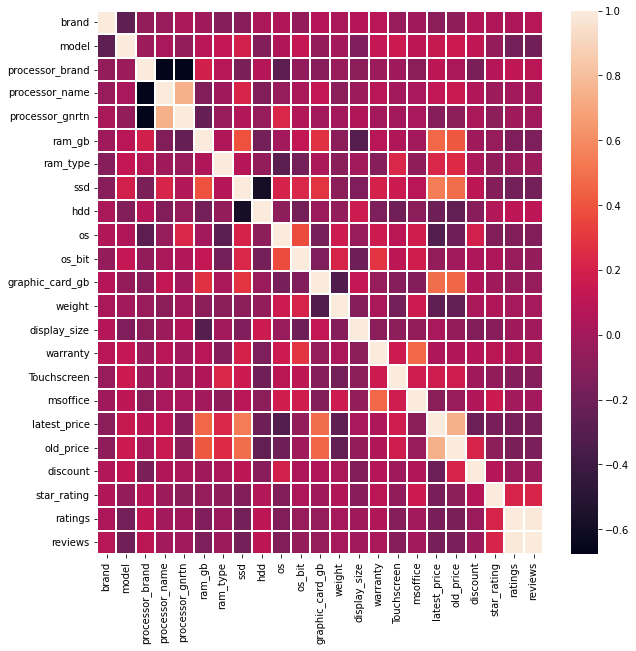

In [105]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), linewidth=1)

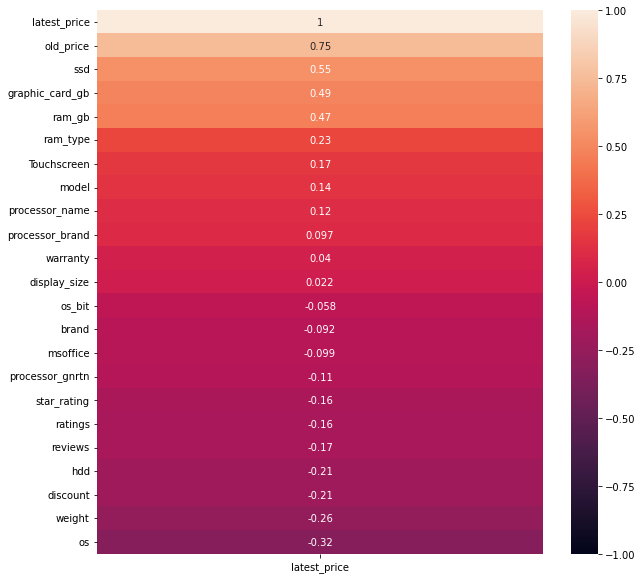

In [106]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr()[['latest_price']].sort_values(by=['latest_price'],ascending=False), vmin=-1, annot=True);

Skewness: 2.380830


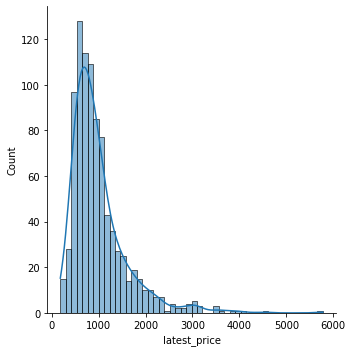

In [107]:
sns.displot(df['latest_price'], kde=True);
print("Skewness: %f" % df['latest_price'].skew())

Skewness: 0.355784


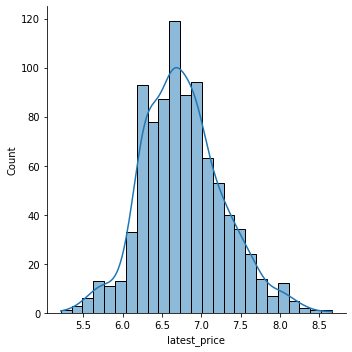

In [108]:
df["latest_price"] = np.log1p(df["latest_price"])
 
sns.displot(df['latest_price'], kde=True)
print("Skewness: %f" % df['latest_price'].skew())

### **Linear Regression**

In [109]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [110]:
features = ['ssd', 'graphic_card_gb', 'ram_gb', 'ram_type', 'Touchscreen', 'model', 'processor_name', 'processor_brand', 'warranty', 'display_size']

In [111]:
X = df[features]
y = df['latest_price']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42) 

In [113]:
linreg = LinearRegression()

In [114]:
linreg.fit(X_train, y_train)

LinearRegression()

In [115]:
print(f'Intercept: {linreg.intercept_}')

list_features = list(zip(features, linreg.coef_))
print('Coefficients: ')
for list_features in list_features:
    print (list_features)

Intercept: 5.417346734860822
Coefficients: 
('ssd', 0.0005004624277902056)
('graphic_card_gb', 0.08655181523219255)
('ram_gb', 0.03336564405737083)
('ram_type', 0.0404499158420543)
('Touchscreen', 0.2709729409614149)
('model', 0.002308651435417086)
('processor_name', 0.013728538990402217)
('processor_brand', 0.22709572205005515)
('warranty', -0.0077280387473893635)
('display_size', 0.015769180144409083)


In [116]:
y_pred = linreg.predict(X_test)

In [117]:
print('Coefficient of Determination:', linreg.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.6649887065774519
Mean Absolute Error: 0.21915249210707938
Mean Squared Error: 0.08439237509391835
Root Mean Squared Error: 0.2905036576257145
